In [1]:
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.shape

(1460, 81)

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 1. Decision/Random - MSSubClass, MSZoning, Street, Alley, LotFrontage, etc
#### 2. Linear - LotArea,   

In [5]:
n = list(train_df.isna().sum())
n1 = pd.DataFrame(n)
n1.columns = ['na']
col_d = pd.DataFrame(train_df.columns)
col_d['e'] = n1
col_d[0:10]

,0,e
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
5,Street,0
6,Alley,1369
7,LotShape,0
8,LandContour,0
9,Utilities,0


In [6]:
#Categorical Values
featu = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd',
         'MasVnrType', 'ExterQual','ExterCond', 'Foundation','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
        'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition' ]

LF_mean = train_df.LotFrontage.mean()
train_df.LotFrontage = train_df.LotFrontage.fillna(train_df.LotFrontage.mean())
for x in featu:
    train_df.dropna(subset=[x], inplace=True)
    train_df

train_df.shape

(1338, 81)

### One Hot Encoding for Categorical Values

In [7]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')

def v(c1):    
    M = pd.DataFrame(onehotencoder.fit_transform(train_df[[c1]]).toarray())
    # get length of df's columns
    num_cols = len(list(M))
    rng = range(0, num_cols)
    new_cols = [c1 + str(i) for i in rng] 
    M.columns = new_cols[:num_cols]
    return M



MS = pd.concat([v(i) for i in featu], axis=1)

MS.head()

,MSZoning0,MSZoning1,MSZoning2,MSZoning3,MSZoning4,Street0,Street1,LotShape0,LotShape1,LotShape2,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
MS.shape

(1338, 229)

In [9]:
MS.isna().sum()

MSZoning0         0
MSZoning1         0
MSZoning2         0
MSZoning3         0
MSZoning4         0
                 ..
SaleCondition1    0
SaleCondition2    0
SaleCondition3    0
SaleCondition4    0
SaleCondition5    0
Length: 229, dtype: int64

In [10]:
MS = MS.reset_index(drop=True)
MS

,MSZoning0,MSZoning1,MSZoning2,MSZoning3,MSZoning4,Street0,Street1,LotShape0,LotShape1,LotShape2,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1334,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Cleaning and selecting numerical columns
numer = train_df.copy()
num_sel = numer[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
               'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
               'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]
num_sel.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [12]:
num_sel.shape

(1338, 36)

In [13]:
num_sel = num_sel.reset_index(drop=True)
num_sel

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1334,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1335,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1336,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [14]:
num_sel.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [15]:
train_clean_df = pd.concat([MS, num_sel], axis=1)
train_clean_df.head()

,MSZoning0,MSZoning1,MSZoning2,MSZoning3,MSZoning4,Street0,Street1,LotShape0,LotShape1,LotShape2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,548,0,61,0,0,0,0,0,2,2008
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,460,298,0,0,0,0,0,0,5,2007
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,608,0,42,0,0,0,0,0,9,2008
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,642,0,35,272,0,0,0,0,2,2006
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,836,192,84,0,0,0,0,0,12,2008


In [16]:
train_clean_df.shape

(1338, 265)

In [17]:
train_clean_df.isna().sum()

MSZoning0      0
MSZoning1      0
MSZoning2      0
MSZoning3      0
MSZoning4      0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 265, dtype: int64

In [18]:
sales_train = train_df.SalePrice
sales_train_df = pd.DataFrame(sales_train)
sales_train_df = sales_train_df.reset_index(drop=True)
sales_train_df

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1333,175000
1334,210000
1335,266500
1336,142125


### Test File

In [19]:

featu_test = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd',
         'MasVnrType', 'ExterQual','ExterCond', 'Foundation','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
        'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition' ]

#Preparing test dataset
LF_mean = test_df.LotFrontage.mean()
test_df.LotFrontage = test_df.LotFrontage.fillna(test_df.LotFrontage.mean())
for x in featu_test:
    test_df.dropna(subset=[x], inplace=True)
    
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [20]:
test_df.shape

(1319, 80)

In [21]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')

def v_test(c1):    
    M = pd.DataFrame(onehotencoder.fit_transform(test_df[[c1]]).toarray())
    # get length of df's columns
    num_cols = len(list(M))
    rng = range(0, num_cols)
    new_cols = [c1 + str(i) for i in rng] 
    M.columns = new_cols[:num_cols]
    return M


MS_test = pd.concat([v_test(i) for i in featu], axis=1)
MS_test
MS_test = MS_test.reset_index(drop=True)
MS_test

,MSZoning0,MSZoning1,MSZoning2,MSZoning3,MSZoning4,Street0,Street1,LotShape0,LotShape1,LotShape2,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1315,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1316,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1317,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
MS_test.shape

(1319, 209)

In [24]:
numer_t = test_df.copy()
num_sel_t = numer_t[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
               'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
               'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]
num_sel_t = num_sel_t.reset_index(drop=True)
num_sel_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [25]:
num_sel_t.shape

(1319, 36)

In [26]:
num_sel_t.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [27]:
test_clean_df = pd.concat([MS_test, num_sel_t], axis=1)
test_clean_df.head()

,MSZoning0,MSZoning1,MSZoning2,MSZoning3,MSZoning4,Street0,Street1,LotShape0,LotShape1,LotShape2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [28]:
test_clean_df.shape

(1319, 245)

In [29]:
test_clean_df.isna().sum()

MSZoning0      0
MSZoning1      0
MSZoning2      0
MSZoning3      0
MSZoning4      0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 245, dtype: int64

### Training and Validation

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
y = sales_train_df.SalePrice
features = [x for x in train_clean_df.columns]
X = train_clean_df[features]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
model_r = RandomForestRegressor(random_state = 0)
model_r.fit(train_X, train_y)
predict_r = model_r.predict(val_X)
predict_r = pd.DataFrame(predict_r, columns=['SalePrice'])
predict_r

,SalePrice
0,121519.74
1,187259.00
2,286397.42
3,218067.39
4,123185.06
...,...
330,322054.88
331,158173.51
332,156123.12
333,106328.08


In [31]:
mae = mean_absolute_error(val_y, predict_r)
mae

17419.704507462688

In [32]:
val_y1 = pd.DataFrame(val_y)
val_y1 = val_y1.reset_index(drop=True)
val_y1

,SalePrice
0,118500
1,195000
2,318000
3,226700
4,116000
...,...
330,290000
331,148800
332,148000
333,102000


In [33]:
score = model_r.score(val_X, val_y)
score

0.809533274115381

In [34]:
val_X = val_X.sort_values('GarageArea')

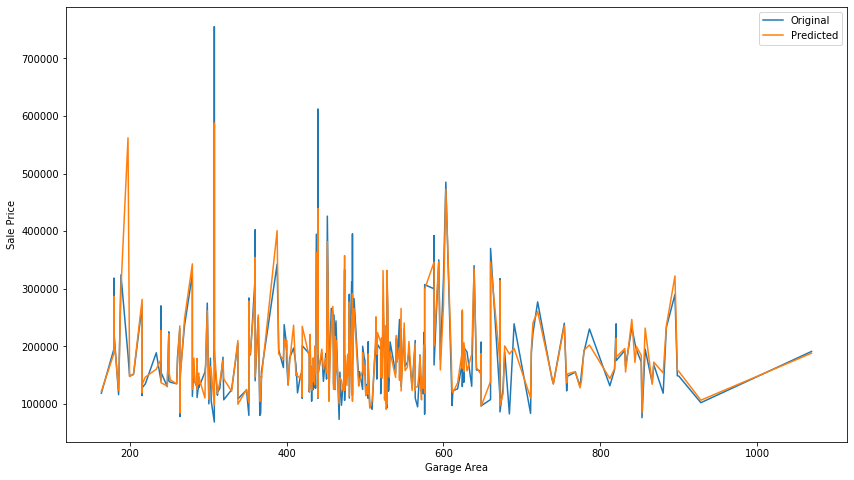

In [35]:
plt.rcParams["figure.figsize"] = [14, 8]
plt.plot(val_X.GarageArea, val_y)
plt.plot(val_X.GarageArea, predict_r)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.legend(['Original', 'Predicted'])
plt.show()

### If test file has less features than train

In [36]:
# Get missing columns in the training test
missing_cols = set( train_clean_df.columns ) - set( test_clean_df.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_clean_df[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_clean_df = test_clean_df[train_clean_df.columns]

### Predicting for test file

In [37]:
cols = [x for x in test_clean_df.columns]
test_X = test_clean_df[cols]
predict_r_t = model_r.predict(test_X)
predict_r_t = pd.DataFrame(predict_r_t, columns=['SalePrice'])
predict_r_t

,SalePrice
0,126990.16
1,152395.07
2,189405.65
3,184824.33
4,203916.12
...,...
1314,154641.27
1315,88797.66
1316,88512.83
1317,155465.50
